## Create a picture with hill climbing using a mosaic grid

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import helper
from individual import Individual

In [3]:
img = cv2.imread("./img/bird_small.jpg")

Image size:(79, 120, 3)


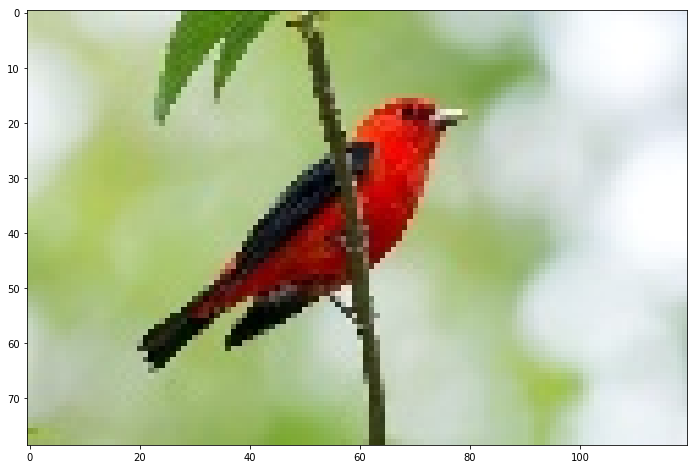

In [4]:
helper.show_img(img)

In [5]:
def get_masks(shape):
    mid_coord = (shape[1]//2, shape[0]//2)
    tl = (0, 0)
    tr = (shape[1], 0)
    bl = (0, shape[0])
    br = (shape[1], shape[0])
    
    top = np.array((tl, mid_coord, tr))
    top = top.reshape((-1, 1, 2))
    
    right = np.array((tr, mid_coord, br))
    right = right.reshape((-1, 1, 2))
    
    bottom = np.array((bl, mid_coord, br))
    bottom = bottom.reshape((-1, 1, 2))
    
    left = np.array((tl, mid_coord, bl))
    left = left.reshape((-1, 1, 2))
    
    top_m = np.zeros(shape)
    cv2.fillPoly(top_m, [top], (1, 0, 0))
    top_m = np.sum(top_m, axis=2).astype(bool)

    right_m = np.zeros(shape)
    cv2.fillPoly(right_m, [right], (1, 0, 0))
    right_m = np.sum(right_m, axis=2).astype(bool)

    bottom_m = np.zeros(shape)
    cv2.fillPoly(bottom_m, [bottom], (1, 0, 0))
    bottom_m = np.sum(bottom_m, axis=2).astype(bool)
    
    left_m = np.zeros(shape)
    cv2.fillPoly(left_m, [left], (1, 0, 0))
    left_m = np.sum(left_m, axis=2).astype(bool)
    
    return top_m, right_m, bottom_m, left_m

In [6]:
def build_square(img):
    masks = get_masks(img.shape)
    for mask in masks:
        color = np.average(img[mask], axis=0)
        img[mask, :] = color.astype(np.uint)
    return img

def build_mosaic(img, grid_size):
    canvas = np.zeros_like(img)
    
    # grid size is (rows, columns)
    r_size = img.shape[0] // grid_size[0]
    c_size = img.shape[1] // grid_size[1]
    
    for r_n in range(grid_size[0]):
        for c_n in range(grid_size[1]):
            # starting coordinates for row/column
            r_s = r_n * r_size
            c_s = c_n * c_size            
            
            # end coordinates for row/column
            if r_n < grid_size[0] - 1:
                r_e = r_s + r_size
            else:
                r_e = img.shape[0]
            if c_n < grid_size[1] - 1:
                c_e = c_s + c_size
            else:
                c_e = img.shape[1]                
            
            canvas[r_s:r_e, c_s:c_e] = build_square(img[r_s:r_e, c_s:c_e])
    
    return canvas

Image size:(79, 120, 3)


True

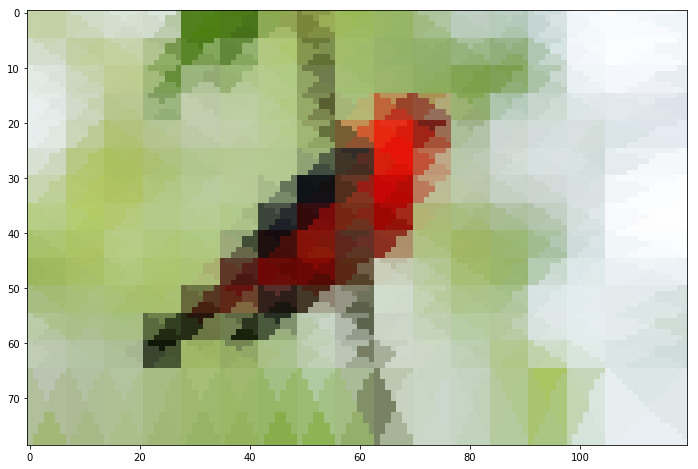

In [7]:
res = build_mosaic(img, (14, 16))
helper.show_img(res)
cv2.imwrite("./mosaic.png", res)

Image size:(70, 108, 3)


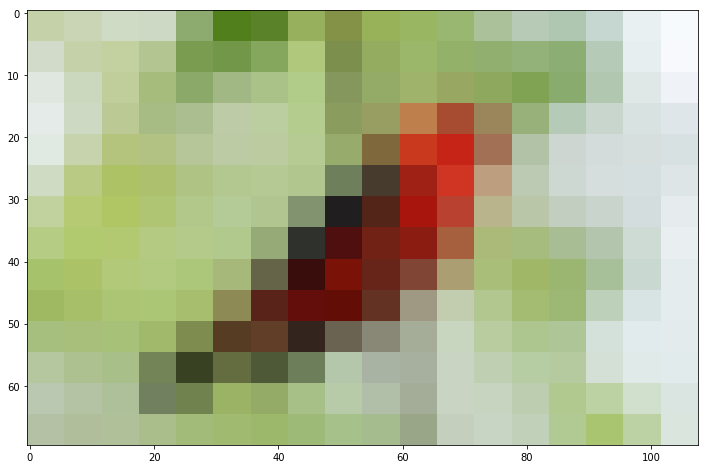

In [8]:
grid_rows = 14
grid_cols = 18
ind = Individual(img, (grid_rows,grid_cols))
ind.draw()
helper.show_img(ind.canvas)

In [9]:
im_name = "bird_small"
cv2.imwrite("./climb/{}_r{}_c{}_i{:0>3}.png".format(im_name, grid_rows, grid_cols, 0), ind.canvas)
for i in range(200):
    print("Iteration: {}".format(i+1))
    ind.mutate()
    cv2.imwrite("./climb/{}_r{}_c{}_i{:0>3}.png".format(im_name, grid_rows, grid_cols, i+1), ind.canvas)

Iteration: 1
OLD: 7604481.0, NEW: 7602203.0 (20/221)
OLD: 7602203.0, NEW: 7593097.0 (29/221)
OLD: 7593097.0, NEW: 7591987.0 (34/221)
OLD: 7591987.0, NEW: 7523293.0 (38/221)
OLD: 7523293.0, NEW: 7522979.0 (45/221)
OLD: 7522979.0, NEW: 7522933.0 (48/221)
OLD: 7522933.0, NEW: 7446573.0 (51/221)
OLD: 7446573.0, NEW: 7424386.0 (55/221)
OLD: 7424386.0, NEW: 7423083.0 (72/221)
OLD: 7423083.0, NEW: 7420386.0 (93/221)
OLD: 7420386.0, NEW: 7410592.0 (113/221)
OLD: 7410592.0, NEW: 7385270.0 (119/221)
OLD: 7385270.0, NEW: 7369160.0 (120/221)
OLD: 7369160.0, NEW: 7202651.0 (127/221)
OLD: 7202651.0, NEW: 7200508.0 (132/221)
OLD: 7200508.0, NEW: 7166456.0 (136/221)
OLD: 7166456.0, NEW: 7143342.0 (141/221)
OLD: 7143342.0, NEW: 7021456.0 (142/221)
OLD: 7021456.0, NEW: 6994250.0 (143/221)
OLD: 6994250.0, NEW: 6993858.0 (154/221)
OLD: 6993858.0, NEW: 6988224.0 (156/221)
OLD: 6988224.0, NEW: 6981274.0 (159/221)
OLD: 6981274.0, NEW: 6978198.0 (165/221)
OLD: 6978198.0, NEW: 6978058.0 (200/221)
OLD: 6978058.

/anaconda3/envs/capitano/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/anaconda3/envs/capitano/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


OLD: 5617353.0, NEW: 5607569.0 (124/221)
OLD: 5607569.0, NEW: 5580111.0 (135/221)
OLD: 5580111.0, NEW: 5579183.0 (188/221)
OLD: 5579183.0, NEW: 5578385.0 (216/221)
Iteration: 8
OLD: 5578385.0, NEW: 5578118.0 (13/221)
OLD: 5578118.0, NEW: 5576084.0 (19/221)
OLD: 5576084.0, NEW: 5575747.0 (22/221)
OLD: 5575747.0, NEW: 5574447.0 (47/221)
OLD: 5574447.0, NEW: 5546659.0 (49/221)
OLD: 5546659.0, NEW: 5543965.0 (60/221)
OLD: 5543965.0, NEW: 5543359.0 (83/221)
OLD: 5543359.0, NEW: 5533551.0 (113/221)
OLD: 5533551.0, NEW: 5487148.0 (115/221)
OLD: 5487148.0, NEW: 5432846.0 (128/221)
OLD: 5432846.0, NEW: 5432631.0 (132/221)
OLD: 5432631.0, NEW: 5432414.0 (141/221)
OLD: 5432414.0, NEW: 5430454.0 (165/221)
OLD: 5430454.0, NEW: 5428409.0 (167/221)
Iteration: 9
OLD: 5428409.0, NEW: 5427976.0 (11/221)
OLD: 5427976.0, NEW: 5427197.0 (33/221)
OLD: 5427197.0, NEW: 5416685.0 (42/221)
OLD: 5416685.0, NEW: 5416071.0 (46/221)
OLD: 5416071.0, NEW: 5406212.0 (48/221)
OLD: 5406212.0, NEW: 5405859.0 (65/221)
OLD

Image size:(70, 108, 3)


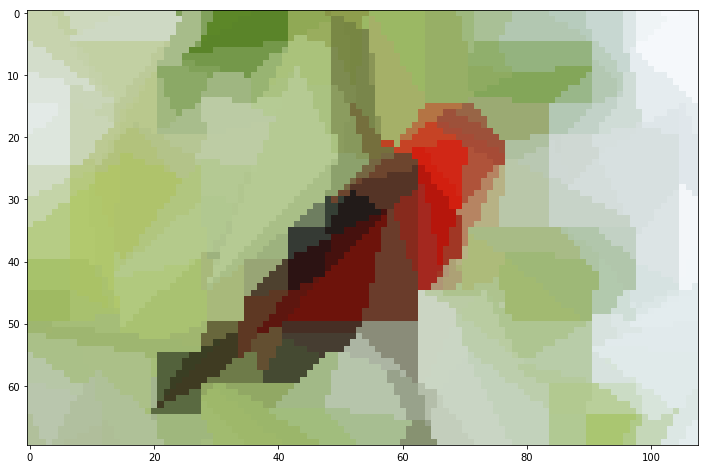

In [11]:
helper.show_img(ind.canvas)